In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [15]:
#import require model from sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
#cardiovascular disease dataset from Kaggle

df = pd.read_csv('../data/cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [13]:
#drop id column because i dont need it
df.drop(df.columns[0], inplace=True, axis=1)

In [14]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
#change age column to year
df['age'] = df['age'].apply(lambda x : x/365)
df['age'] = df['age'].astype(int)

In [18]:
#df.head()

In [19]:
#check null values in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


<AxesSubplot:title={'center':'Distribution of Genders (1 - Female; 2 - Male)'}, xlabel='Gender', ylabel='Number of Occurences'>

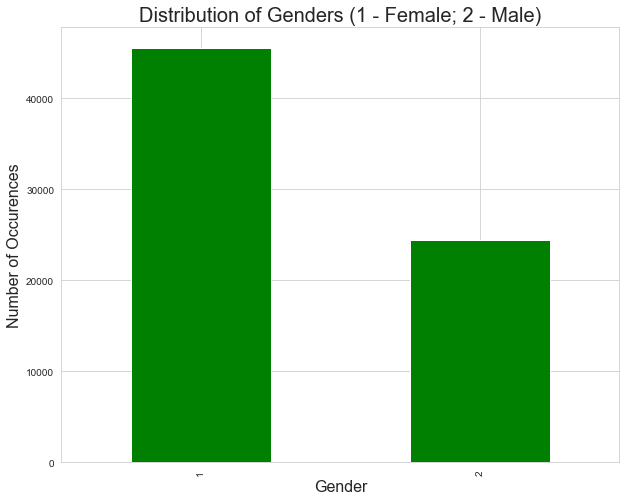

In [23]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.set_title('Distribution of Genders (1 - Female; 2 - Male)', fontsize = 20)
ax.set_xlabel("Gender", fontsize = 16)
ax.set_ylabel("Number of Occurences", fontsize = 16)
df["gender"].value_counts().plot(ax = ax, kind = "bar", color = "green")

<AxesSubplot:title={'center':'Distribution of Heights'}, xlabel='Height in cm', ylabel='Number of Occurences'>

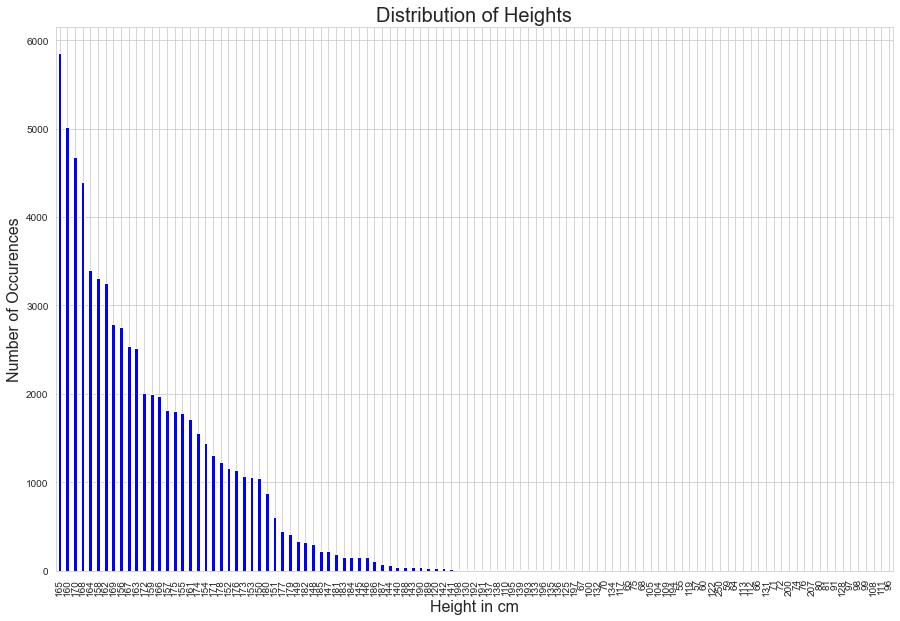

In [27]:
fig, ax = plt.subplots(figsize = (15, 10))
ax.set_title('Distribution of Heights', fontsize = 20)
ax.set_xlabel("Height in cm", fontsize = 16)
ax.set_ylabel("Number of Occurences", fontsize = 16)
df["height"].value_counts().plot(ax = ax, kind = "bar", color = "blue")

In [28]:
#set X and y to train the model
X = df.drop('cardio', axis=1)
y = df['cardio']

In [30]:
#train test split for cross validation, set test size to 30% of dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
#to scale data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [37]:
#transform data to fit into model
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
#KNN algorithm from sklearn
knn_model = KNeighborsClassifier(n_neighbors = 5)

In [39]:
#training...
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
#get prediction
prediction = knn_model.predict(X_test)

In [43]:
#it come with ndarray (non dimensional array)
type(prediction)

numpy.ndarray

In [45]:
#accuracy score for the model
knn_model.score(X_test, y_test)

0.6517619047619048

In [46]:
print(classification_report(y_test, prediction))
#print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66     10504
           1       0.66      0.62      0.64     10496

    accuracy                           0.65     21000
   macro avg       0.65      0.65      0.65     21000
weighted avg       0.65      0.65      0.65     21000



In [47]:
#####################